In [11]:
# Problem 1
import numpy as np
import scipy.linalg.interpolative as slid

a = np.array([[-1.32 , -0.18 , 2.13], [2.64  , -4.68 , 4.65], [1.47  , -4.75 , 6.80]])

#a = np.array([[1 , 0 , 2.02 ], [2 , 2 , 10.03], [3 , 1 , 8.98 ]])

U,sigma,V = np.linalg.svd(a)

sigma = np.diag(sigma)

print(sigma)

print('Number of independent columns : {0}'.format(np.linalg.matrix_rank(sigma,tol = 10e-1)))

[[11.01365384  0.          0.        ]
 [ 0.          2.54146561  0.        ]
 [ 0.          0.          0.09990768]]
Number of independent columns : 2


In [2]:
# Problem 2
import numpy as np
from numpy.linalg import inv

# X and Y coordinates from problem description
x = [-1, 2.5, 6.0, -3.5, 3.0, 8.5]
y = [8.5, 3.0, -5.5, 13.0, 0.0, -10.0]

# TODO: Form the A matrix and the b vector
A = np.concatenate((np.transpose([x]),np.ones((6,1))),axis=1)
b = np.transpose([y])

# TODO: Find the vector q
q = np.matmul(np.matmul(inv(np.matmul(A.transpose(),A)),A.transpose()),b).flatten()

# Display computed q vector
print('y = {0:2.3f}x + {1:2.3f}'.format(q[0], q[1]))

y = -1.941x + 6.515


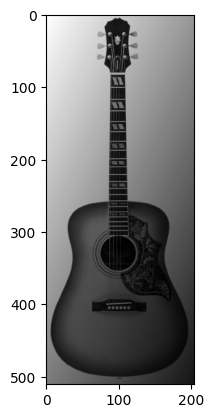

f(x,y) = -0.002x + -0.001y + 0.995


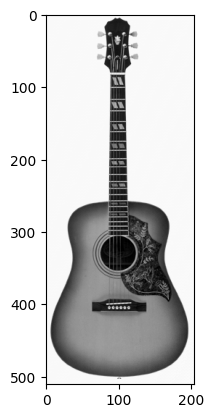

In [3]:
# problem 6
import numpy as np
from PIL import Image
from numpy.linalg import inv
import matplotlib.pyplot as plt

# To make the code work in VS code I had to comment out this part 
"""
# Load cguitar.tif from local machine into Colab instance
# Note: You only need to run this once
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
"""

img = np.asarray(Image.open('cguitar.tif'))

# Hint: Use the following lines to display an image
plt.imshow(img, cmap='gray')
plt.show()

# TODO: Compute least-squares estimate from selected corrupt pixels
trueColorValue = 255

A = np.zeros((250*50,3))

B = np.zeros(250*50)

j = 0
for y in range(250):
    for x in range(50):
        A [j,0] = trueColorValue*x
        A [j,1] = trueColorValue*y
        A [j,2] = trueColorValue
        B [j] = img[y,x]
        j = j+1

q = np.linalg.lstsq(A, B, rcond=None)[0]

a = q[0]
b = q[1]
c = q[2]

print('f(x,y) = {0:2.3f}x + {1:2.3f}y + {2:2.3f}'.format(q[0], q[1],q[2]))

# TODO: Undo the image corruption
correctedImage = np.zeros((len(img),len(img[0])))

for y in range(len(img)):
    for x in range(len(img[0])):
        correctedImage[y,x] = img[y,x] / (a*x + b*y + c)
        
# TODO: Display the uncorrupted image
plt.imshow(correctedImage, cmap='gray')
plt.show()

In [ ]:
# problem 7